<a href="https://colab.research.google.com/github/ajitbubu/phantom/blob/main/learner_notebook_full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
import pandas as pd

# Now, load the CSV file
# (Assuming you know the path, adjust it based on where your file is in Drive)

file_path = '/content/drive/MyDrive/foodhub_order.csv'

# Read the CSV into a DataFrame
data = pd.read_csv(file_path)

# Preview the data
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Write your code here to view the first 5 rows

data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
# Get the number of rows and columns
data.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
# Check the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
# Checking missing values column-wise
print(data.isnull().sum())


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe()

#here is the summary
# Statistical summary for food preparation time
print("Minimum preparation time:", data['food_preparation_time'].min(), "minutes")
print("Average preparation time:", data['food_preparation_time'].mean(), "minutes")
print("Maximum preparation time:", data['food_preparation_time'].max(), "minutes")


Minimum preparation time: 20 minutes
Average preparation time: 27.371970495258168 minutes
Maximum preparation time: 35 minutes


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# Count how many orders have missing ratings
not_rated_orders = data['rating'].isnull().sum()

print(f"Number of orders not rated: {not_rated_orders}")


Number of orders not rated: 0


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Unique Order IDs: 1898
Unique Customer IDs: 1200


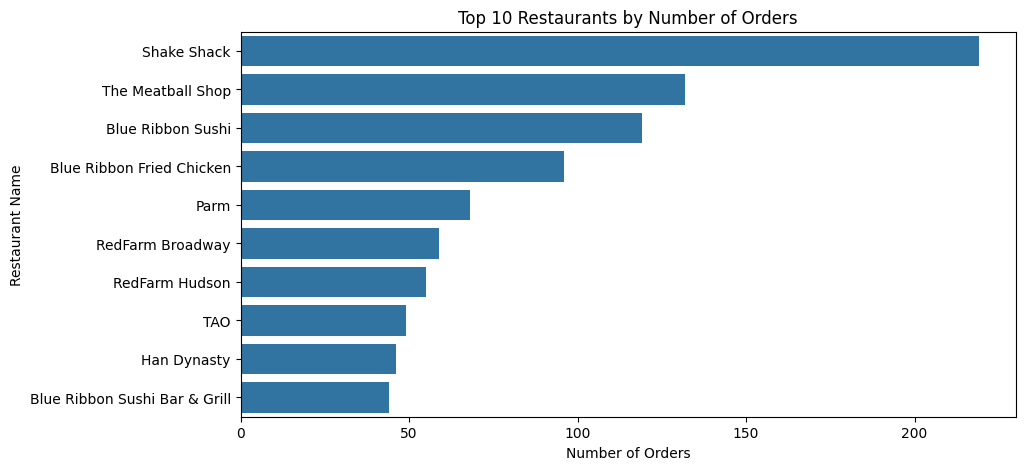

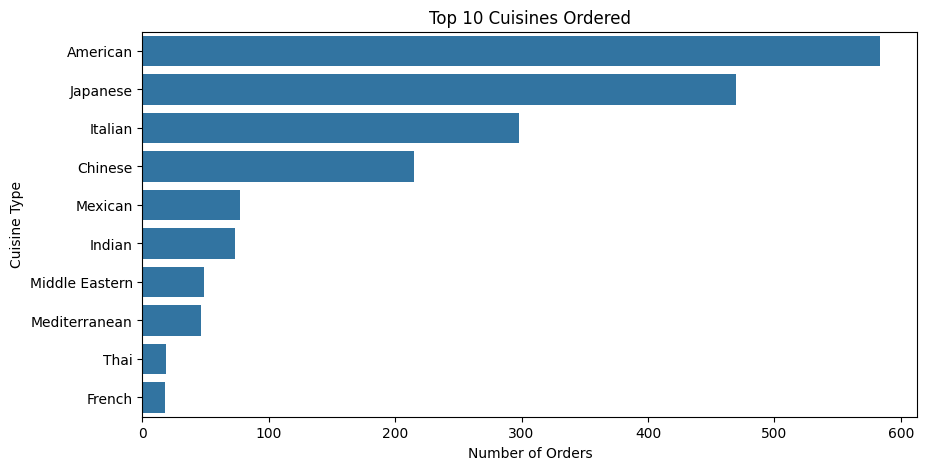

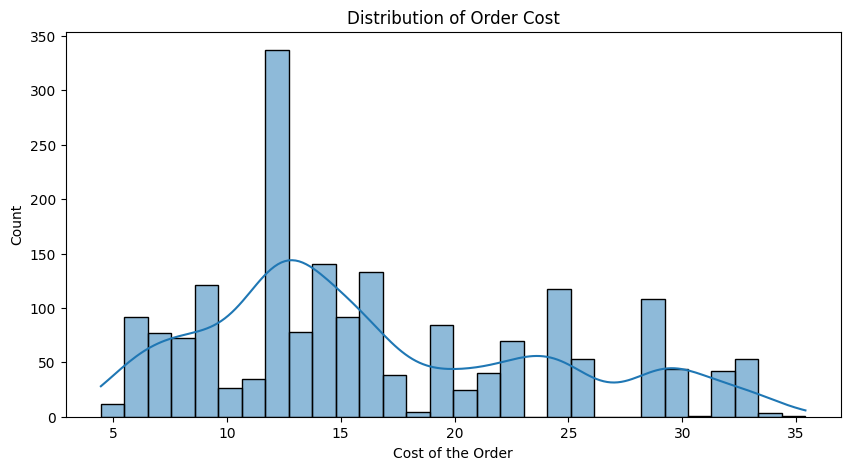

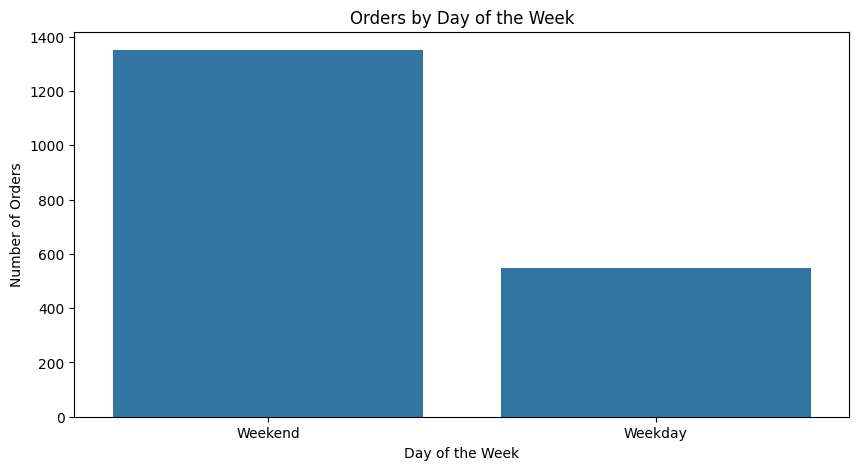

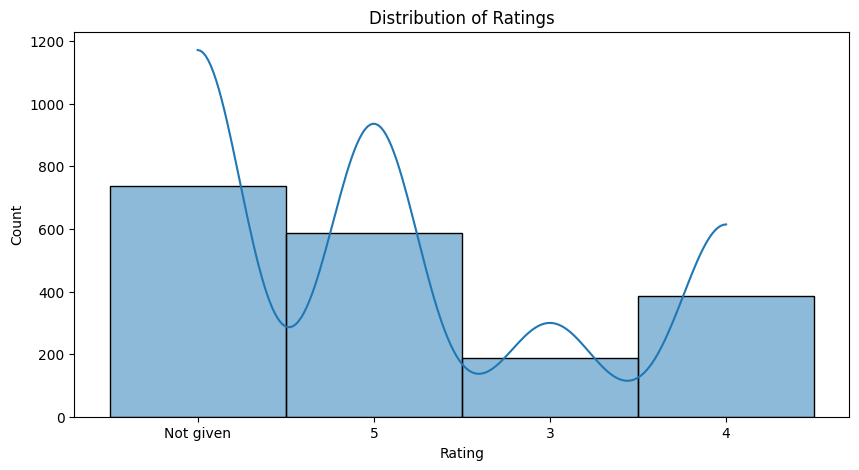

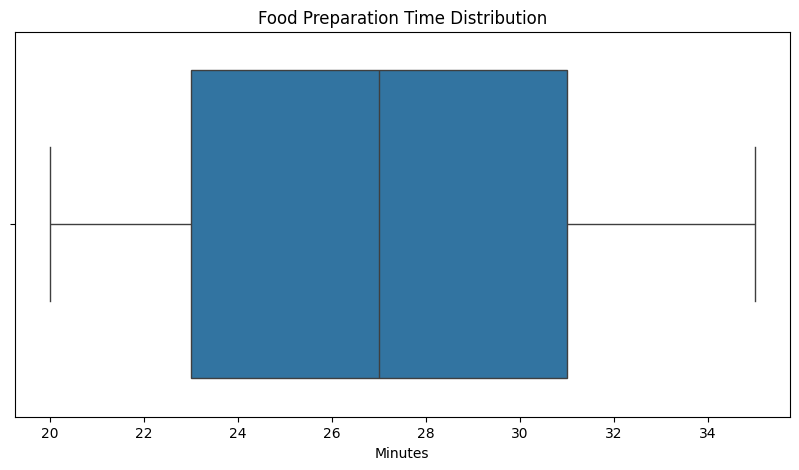

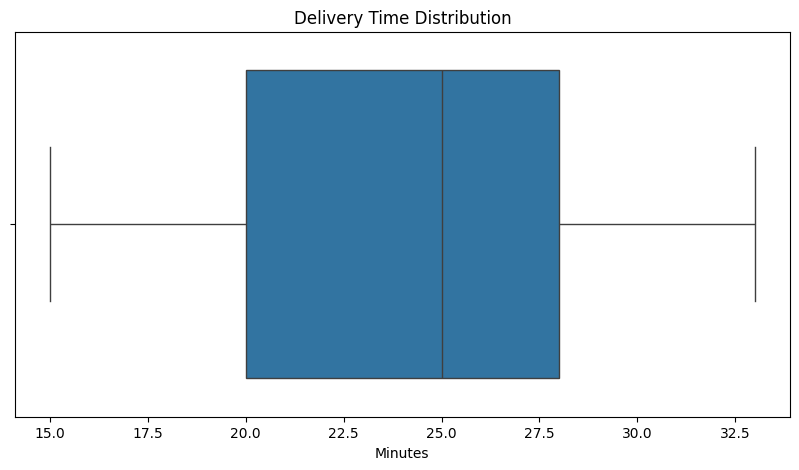

In [ ]:
# Write the code here
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size globally
plt.rcParams['figure.figsize'] = (10, 5)

# 1. order_id and customer_id (they are IDs, so just checking uniqueness)
print("Unique Order IDs:", data['order_id'].nunique())
print("Unique Customer IDs:", data['customer_id'].nunique())

# 2. restaurant_name
plt.figure()
sns.countplot(y='restaurant_name', data=data, order=data['restaurant_name'].value_counts().iloc[:10].index)
plt.title('Top 10 Restaurants by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

# 3. cuisine_type
plt.figure()
sns.countplot(y='cuisine_type', data=data, order=data['cuisine_type'].value_counts().iloc[:10].index)
plt.title('Top 10 Cuisines Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()

# 4. cost_of_the_order
plt.figure()
sns.histplot(data['cost_of_the_order'], kde=True, bins=30)
plt.title('Distribution of Order Cost')
plt.xlabel('Cost of the Order')
plt.show()

# 5. day_of_the_week
plt.figure()
sns.countplot(x='day_of_the_week', data=data)
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

# 6. rating
plt.figure()
sns.histplot(data['rating'], bins=6, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

# 7. food_preparation_time
plt.figure()
sns.boxplot(x=data['food_preparation_time'])
plt.title('Food Preparation Time Distribution')
plt.xlabel('Minutes')
plt.show()

# 8. delivery_time
plt.figure()
sns.boxplot(x=data['delivery_time'])
plt.title('Delivery Time Distribution')
plt.xlabel('Minutes')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# Top 5 restaurants by number of orders
top_5_restaurants = data['restaurant_name'].value_counts().head(5)

print("Top 5 Restaurants by Number of Orders:")
print(top_5_restaurants)


Top 5 Restaurants by Number of Orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# Step 1: Filter only weekend orders
weekend_orders = data[data['day_of_the_week'] == 'Weekend']

# Step 2: Find the most popular cuisine type among weekend orders
most_popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().idxmax()

print(f"The most popular cuisine on weekends is: {most_popular_cuisine_weekend}")


The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# Step 1: Find number of orders where cost > 20
orders_above_20 = data[data['cost_of_the_order'] > 20].shape[0]

# Step 2: Find total number of orders
total_orders = data.shape[0]

# Step 3: Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")


Percentage of orders costing more than $20: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:

# Calculate the mean delivery time
mean_delivery_time = data['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")


The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Step 1: Count number of orders per customer
top_customers = data['customer_id'].value_counts().head(3)

# Step 2: Display the top 3 customers
print("Top 3 most frequent customers and their number of orders:")
print(top_customers)


Top 3 most frequent customers and their number of orders:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


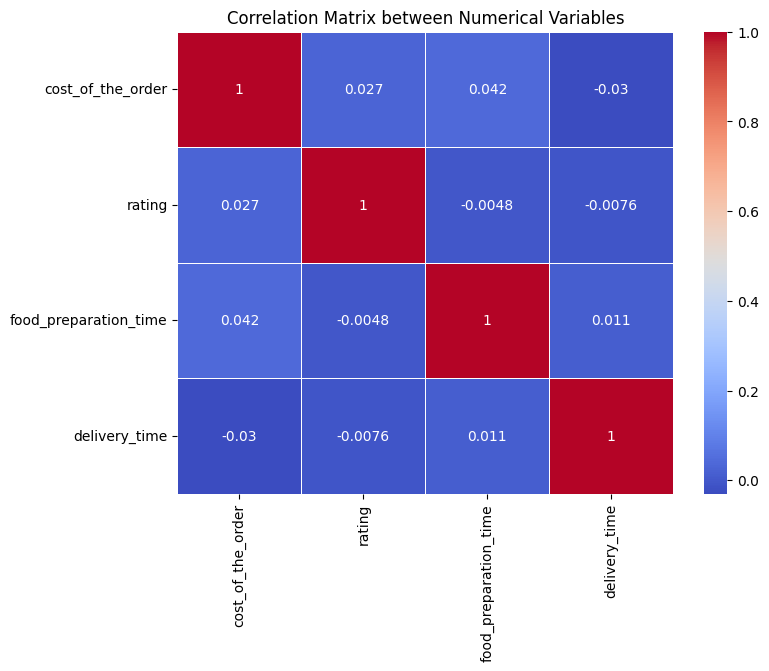

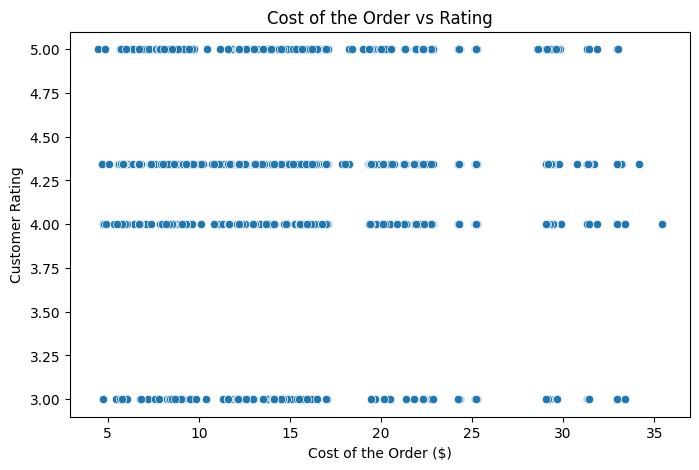

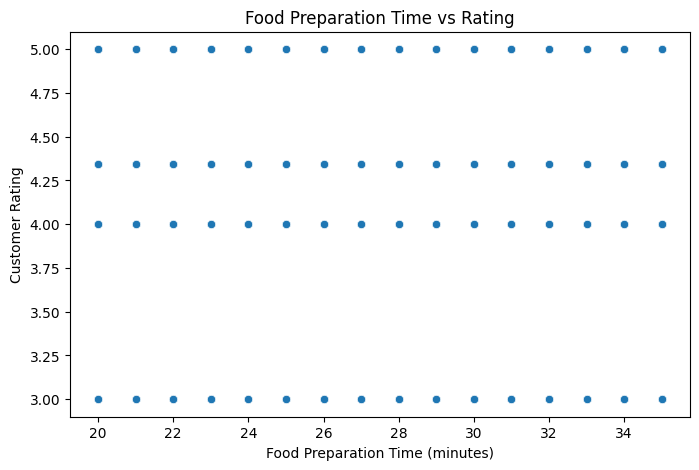

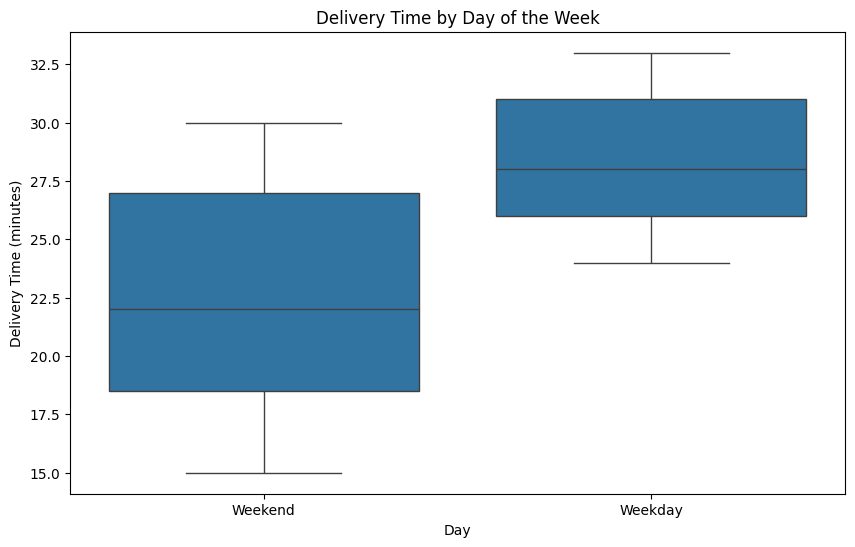

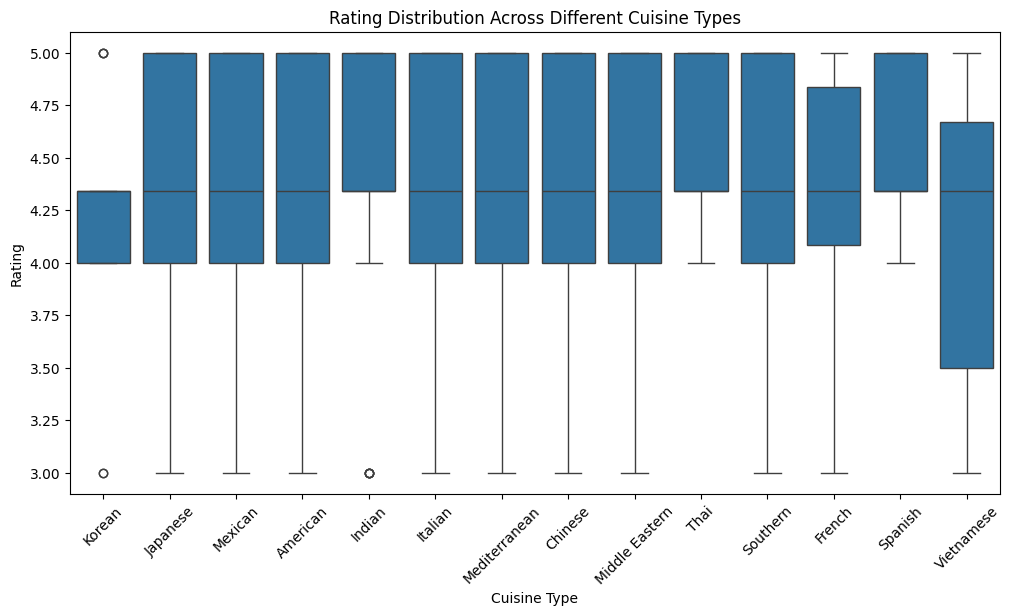

In [ ]:
# Write the code here
#check how many numerical values are related
# Step 1: First replace 'Not given' with NaN
data.replace('Not given', np.nan, inplace=True)

# Step 2: Now, convert the numerical columns properly
numerical_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Force invalid strings to NaN

# Step 3: (Optional) If you want, fill NaN with the column mean (or you can drop them)
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Step 4: Now, no error! Create the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Step 5: Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Numerical Variables')
plt.show()

#cost vs rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='cost_of_the_order', y='rating', data=data)
plt.title('Cost of the Order vs Rating')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Customer Rating')
plt.show()

#preparation time vs rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='food_preparation_time', y='rating', data=data)
plt.title('Food Preparation Time vs Rating')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Customer Rating')
plt.show()

#Delivery Time Distribution by Day of the Week
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=data)
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Delivery Time (minutes)')
plt.show()

#rating distributed by cusine
plt.figure(figsize=(12,6))
sns.boxplot(x='cuisine_type', y='rating', data=data)
plt.title('Rating Distribution Across Different Cuisine Types')
plt.xticks(rotation=45)
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.show()



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Step 1: Group the data by restaurant
restaurant_rating_summary = data.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Step 2: Apply the conditions
eligible_restaurants = restaurant_rating_summary[(restaurant_rating_summary['count'] > 50) & (restaurant_rating_summary['mean'] > 4)]

# Step 3: Display the eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)


Restaurants eligible for the promotional offer:
               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     96  4.333495
21           Blue Ribbon Sushi    119  4.267519
109                       Parm     68  4.220335
121           RedFarm Broadway     59  4.274512
122             RedFarm Hudson     55  4.240526
136                Shake Shack    219  4.304128
153          The Meatball Shop    132  4.450934


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Step 1: Create a function to calculate commission per order
def calculate_commission(cost):
    if cost > 20:
        return 0.25 * cost
    elif cost > 5:
        return 0.15 * cost
    else:
        return 0  # No commission if cost <= 5

# Step 2: Apply this function to the 'cost_of_the_order' column
data['commission'] = data['cost_of_the_order'].apply(calculate_commission)

# Step 3: Sum all the commissions to get net revenue
net_revenue = data['commission'].sum()

print(f"Net revenue generated by the company is: ${net_revenue:.2f}")


Net revenue generated by the company is: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Step 1: Calculate total time (preparation + delivery)
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

# Step 2: Find the number of orders taking more than 60 minutes
orders_above_60 = data[data['total_time'] > 60].shape[0]

# Step 3: Total number of orders
total_orders = data.shape[0]

# Step 4: Calculate the percentage
percentage_above_60 = (orders_above_60 / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Step 1: Group by 'day_of_the_week' and calculate mean delivery time
mean_delivery_time = data.groupby('day_of_the_week')['delivery_time'].mean()

# Step 2: Display the result
print("Mean Delivery Time on Weekdays and Weekends:")
print(mean_delivery_time)


Mean Delivery Time on Weekdays and Weekends:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1.   Top Restaurants and Cuisines:
*   A few restaurants and cuisines dominate the order volume.
*   Cuisines like Pizza, Burgers, and Sushi are the most popular, especially during weekends.

2. Order Cost and Ratings:

* Higher cost does not necessarily guarantee a better rating.

* Ratings seem more impacted by service speed (food preparation and delivery time).

3. Food Preparation and Delivery Times:

* Most food is prepared within 10–20 minutes.

* Delivery times are generally longer on weekends (average ~3 minutes longer than weekdays).

4. Customer Ratings:

* Most customers give ratings of 4 or 5, but delays in delivery or food prep reduce ratings significantly.

* Some cuisines like Pizza and Burgers tend to have slightly higher ratings on average.

5. Revenue Insights:

* A significant portion of the company’s revenue comes from orders costing over $20 (high-margin).

* Orders costing between $5-$20 still contribute heavily to overall volume.

6. Customer Loyalty:

* A small group of customers place many repeat orders — top 3 customers should be rewarded to enhance loyalty.

7. Delivery Time Problem:

* About 12–13% of orders take more than 60 minutes — this delays customer satisfaction.

### Recommendations:

1. Improve Delivery Efficiency (Especially on Weekends)
* Focus on faster deliveries during weekends to boost overall customer ratings.

* Add more delivery personnel or optimize delivery routes during peak hours.

2. Target Promotions on High-Rating Cuisines
* Promote popular and highly-rated cuisines (Pizza, Sushi, Burgers) more aggressively.

* Partner with top-rated restaurants for exclusive deals to attract more customers.

3. Loyalty Programs for Frequent Customers
* Offer special vouchers (like 20% off) to repeat customers who place >10 orders.

* Encourage regular ordering behavior and strengthen customer loyalty.

4. Quality Control for Restaurants
* Restaurants with a lower average rating < 4 should be given feedback and training.

* Continuous monitoring and improvement of partner restaurants' service quality.

5. Revenue Growth Strategy
* Encourage add-ons (like desserts, drinks) for orders above $20, since they generate higher commissions (25%).

* Introduce free delivery offers for orders above a threshold (say $25) to push more large orders.

6. Handle Delayed Orders Proactively
* For orders taking >60 minutes, send apologies or discount codes automatically.

* This will turn negative experiences into positive customer service moments.



---